In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [4]:
# Load MNIST dataset from Keras
(X_train, y_train), (_, _) = mnist.load_data()

# Flatten and normalize the data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_train_flat = X_train_flat.astype(float)
X_train_flat /= 255.0  # Normalize pixel values to range [0, 1]



In [6]:
# Step 1: Compute the covariance matrix
cov_matrix = np.cov(X_train_flat.T)



In [7]:
# Step 2: Perform eigen decomposition of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)



In [8]:
# Step 3: Select the principal components
# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]



In [9]:
# Step 4: Transform the data onto the new feature space
# Choose the number of components
num_components = 2
projection_matrix = eigenvectors[:, :num_components]
X_train_pca = X_train_flat.dot(projection_matrix)



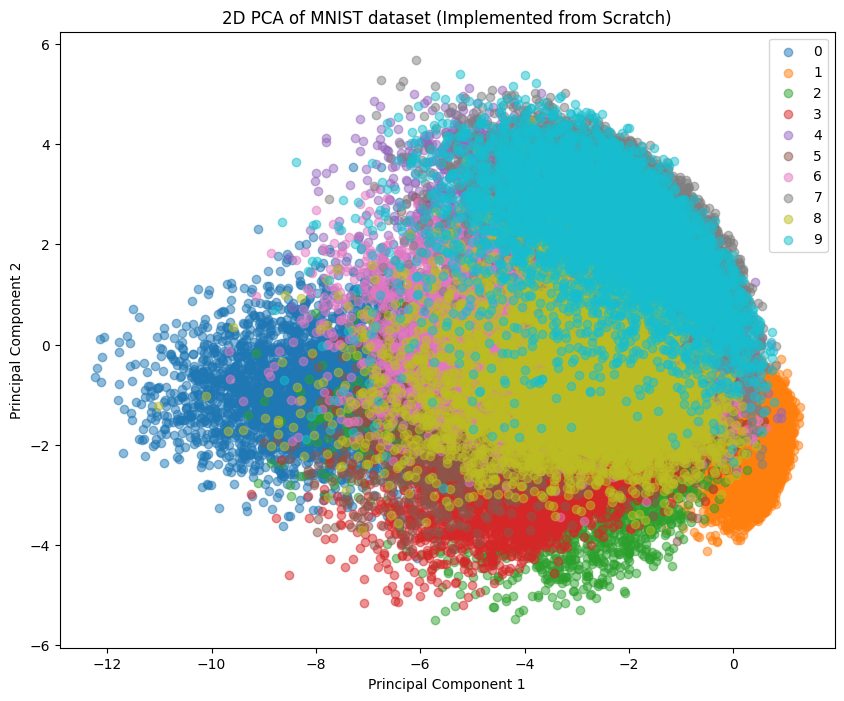

In [10]:
# Plotting PCA result
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=str(i), alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of MNIST dataset (Implemented from Scratch)')
plt.legend()
plt.show()